In [1]:
library(dplyr)
library(ggplot2)
library(repr)
library(reshape2)
library(stringr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
counties <- read.csv(url("https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/counties/totals/co-est2017-alldata.csv"))

In [3]:
nebraska <- counties %>% filter(STNAME == "Nebraska") %>% filter(SUMLEV == 50) %>% mutate(change = ((POPESTIMATE2017-POPESTIMATE2016)/POPESTIMATE2016)*100, pos = change >0)

In [8]:
nebraskasorted <- arrange(nebraska, desc(change)) %>% 
mutate(County = str_replace(CTYNAME, " County", "")) %>%
mutate(County = factor(County, County))

In [9]:
options(repr.plot.width=5, repr.plot.height=10)

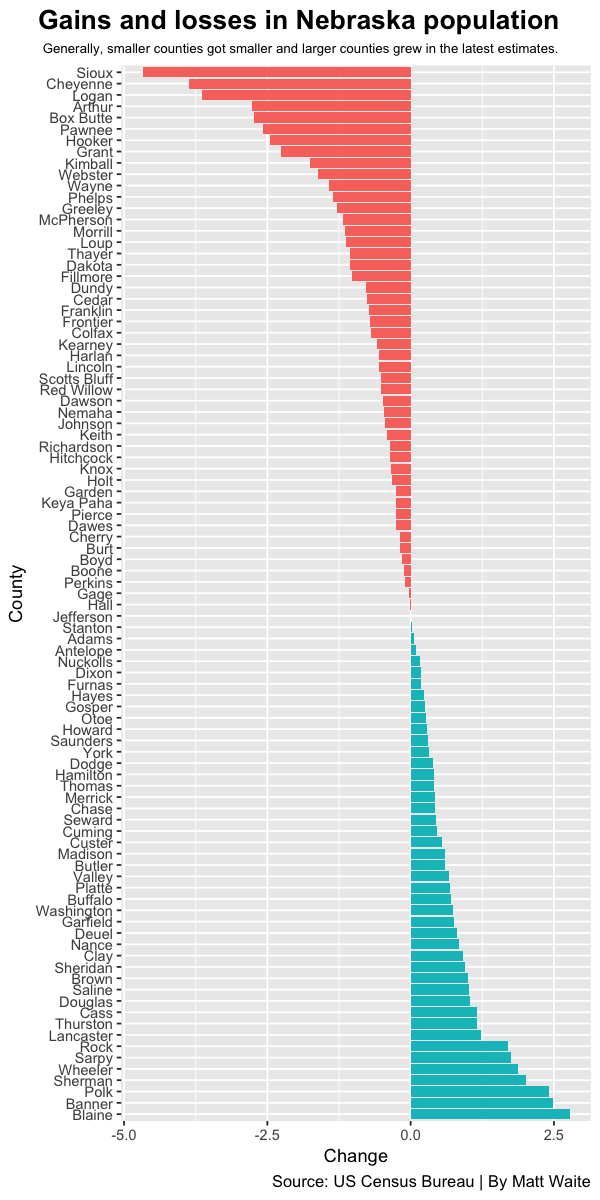

In [10]:
ggplot(nebraskasorted, aes(x=County, y=change, fill=pos)) + 
geom_bar(stat='identity', position='identity') + 
coord_flip() +
guides(fill=FALSE) +
labs(x="County", y="Change", title="Gains and losses in Nebraska population", subtitle="Generally, smaller counties got smaller and larger counties grew in the latest estimates.", caption="Source: US Census Bureau | By Matt Waite") +
theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 1.6), 
    plot.subtitle = element_text(size = 8, hjust = 1.7)
)

In [11]:
neselected <- nebraska %>% select("CTYNAME", "STNAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017")

In [12]:
nelong <- melt(neselected)

Using CTYNAME, STNAME as id variables


In [13]:
nelongyears <- nelong %>% 
mutate(year = as.integer(str_sub(variable, start= -4))) %>%
mutate(County = str_replace(CTYNAME, " County", ""))

In [14]:
options(repr.plot.width=11, repr.plot.height=8)

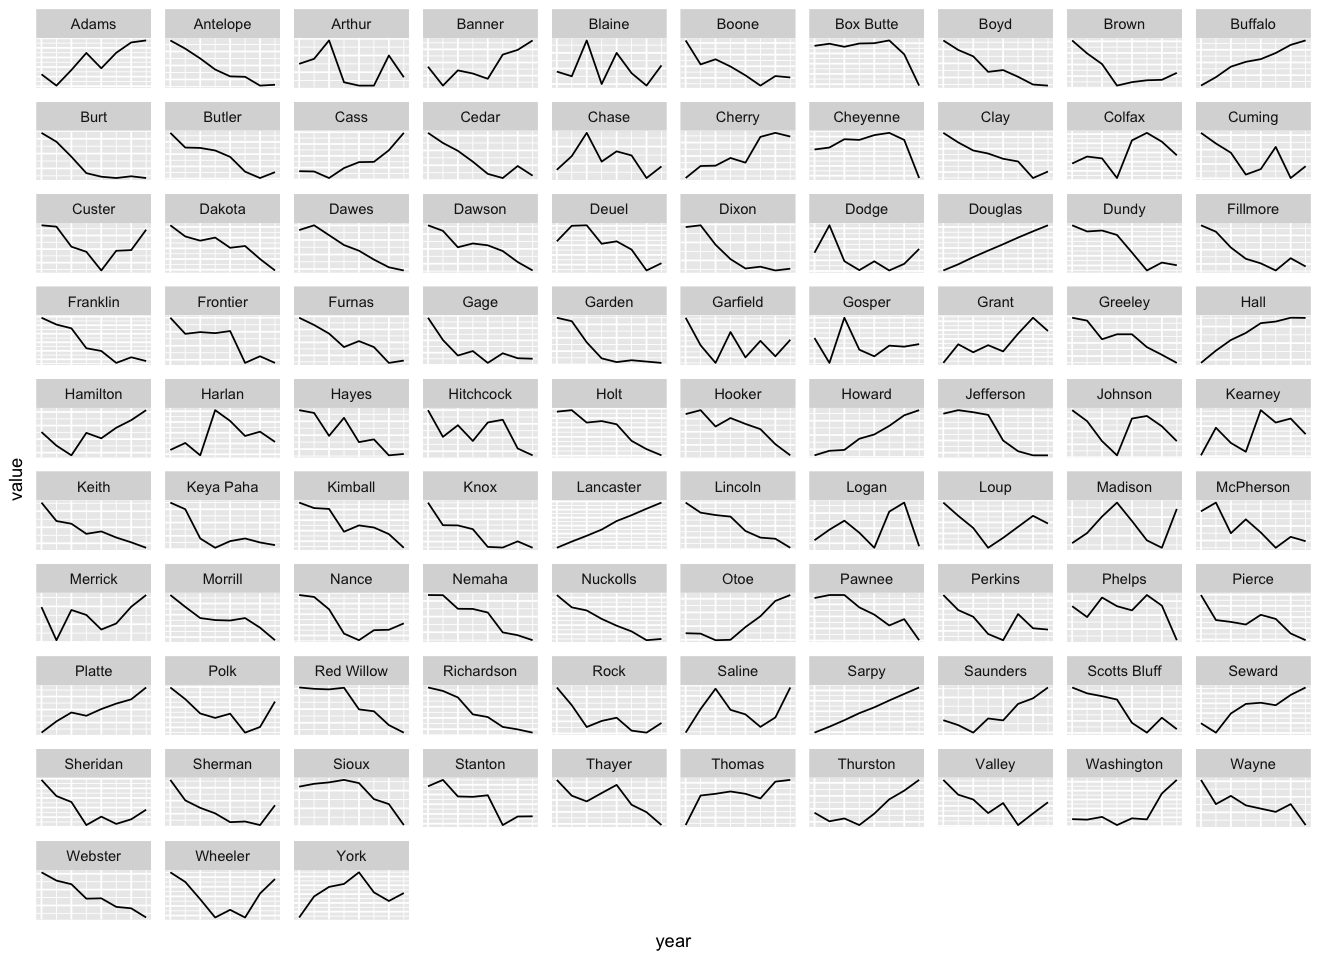

In [18]:
ggplot(nelongyears, aes(x=year, y=value, group=County)) + geom_line() + theme(axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks = element_blank()) + scale_colour_gradient(low="blue", high="red") + facet_wrap(~County, scales = "free")